In [161]:
import pandas as pd
data=pd.read_csv("delivery_time.csv")
print(data.shape)
data.head()

(21, 2)


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [162]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# EDA and Data Visualation

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

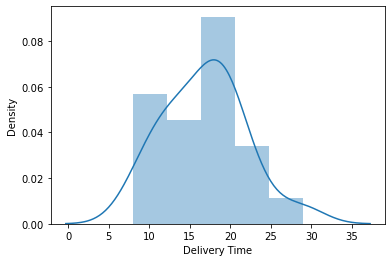

In [164]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

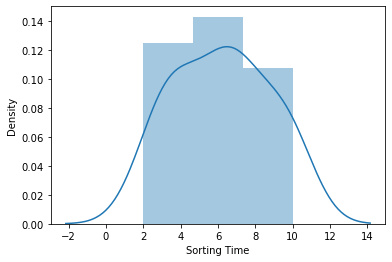

In [165]:
import seaborn as sns
sns.distplot(data['Sorting Time'])

Text(0, 0.5, 'Sorting Time')

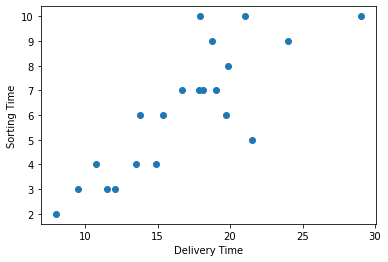

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter("Delivery Time","Sorting Time",data=data)
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")

# Correlation

In [167]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


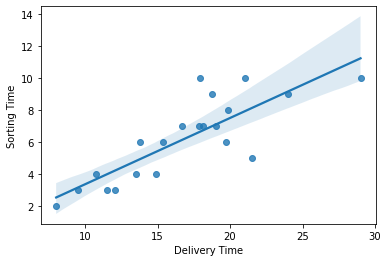

In [168]:
sns.regplot(x="Delivery Time", y="Sorting Time", data=data);

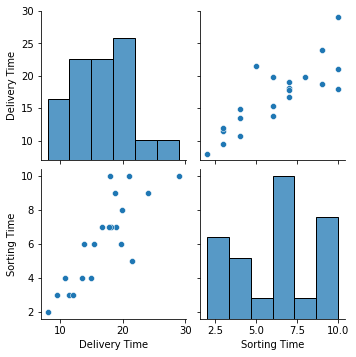

In [169]:
sns.pairplot(data)

In [170]:
data = data.rename(columns = {'Delivery Time':'DT','Sorting Time':'ST'},inplace=False)

In [171]:
data

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [172]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data=data).fit()

In [173]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           3.98e-06
Time:                        12:12:02   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

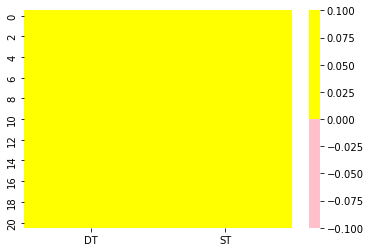

In [174]:
import seaborn as sns
cols = data.columns 
colours = ['#ffc0cb', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

<AxesSubplot:>

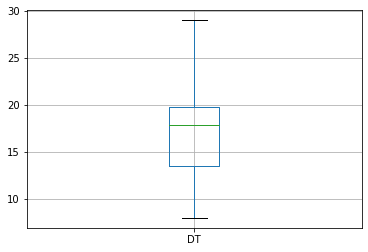

In [175]:
#Box plot
data.boxplot(column=['DT'])

<AxesSubplot:>

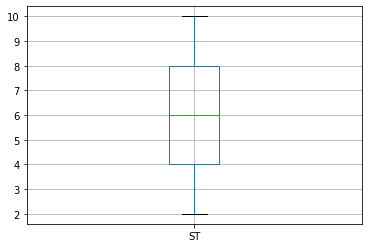

In [176]:
#Box plot
data.boxplot(column=['ST'])

In [177]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 2)

<AxesSubplot:>

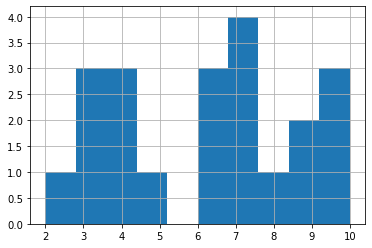

In [178]:
# histogram of Ozone
data['ST'].hist()

# Model Testing

In [179]:
#Coefficients
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [180]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [181]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Model Prediction

In [182]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [183]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [184]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [185]:
data1 = pd.read_csv("delivery_time.csv")

In [186]:
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [187]:
data1.tail(10)

,Delivery Time,Sorting Time
11,10.75,4
12,16.68,7
13,11.50,3
14,12.03,3
15,14.88,4
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [188]:
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [189]:
#Data Structure 
type(data1)
data1.shape

(21, 2)

In [190]:
#data types
data1.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

# Data Conversion

In [191]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [192]:
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [193]:
data2=data1.iloc[:,1:]

In [194]:
data2

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [195]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data=data2.copy()

In [196]:
data['Sorting Time']=pd.to_numeric(data['Sorting Time'],errors='coerce')

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Sorting Time  21 non-null     int64
dtypes: int64(1)
memory usage: 296.0 bytes


# Duplicates

In [198]:
#Count of duplicated rows
data[data.duplicated()].shape

(12, 1)

In [199]:
data

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [200]:
#Print the duplicated rows
data[data.duplicated()]

,Sorting Time
4,10
5,6
8,10
9,9
11,4
12,7
13,3
14,3
15,4
16,6


In [201]:
data_cleaned1=data.drop_duplicates()

In [202]:
data_cleaned1.shape

(9, 1)